#2D Vector Field Plotters 

Importing the Packages

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
sns.set() # uncomment to not use the seaborn aesthetic configuration
import matplotlib as mpl

#mpl.rcParams.update(mpl.rcParamsDefault) #uncomment to use dark background
#plt.style.use("dark_background") #uncomment to use dark background
plt.style.use("fivethirtyeight")

Function to create a 2D vector field given a first order system of ODEs with $x' = f(x,y)$ and $y' = g(x,y)$. Accepts derivative functions, bounds for the graph, as well as the approximate number of vectors to graph (the algorithm rounds up for simplicity).

In [32]:
def vector_field(dx,dy,xmin,xmax,ymin,ymax,numVectors=100,color="gray"):
  x,y = np.meshgrid(np.linspace(xmin,xmax,int(np.sqrt(numVectors)+1)),np.linspace(ymin,ymax,int(np.sqrt(numVectors)+1)))
  u = dx(x,y)
  v = dy(x,y)
  plt.quiver(x,y,u,v,color=color)

**EXAMPLE** - *Competing Species Model*
$$x' = x(1-\frac{x}{K_x} - \frac{y}{E_y})$$
$$y' = y(1-\frac{x}{E_x} - \frac{y}{K_y})$$

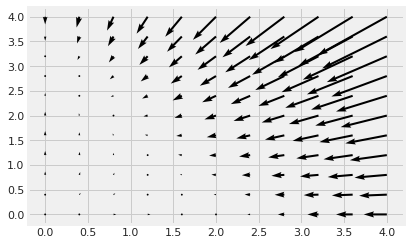

In [33]:
#specific parameters and encoding for x'(t) and y'(t)
[E_x,E_y,K_x,K_y] = [3,2,2,3]
def dx(x,y):
  return(x*(1-x/K_x - y/E_y))
def dy(x,y):
  return(y*(1-x/E_x-y/K_y))

#generating the vector field in the space [0,4] x [0,4]
vector_field(dx,dy,0,4,0,4,numVectors=100,color="black")

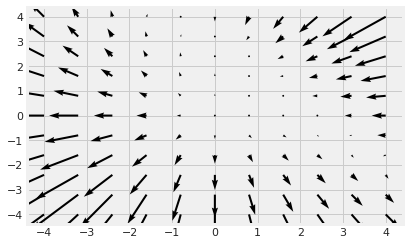

In [34]:
#generating the competing species vector field in the space [-4,4] x [-4,4]
#(not useful from a practical perspective but we can see some of the other quadrants)
vector_field(dx,dy,-4,4,-4,4,numVectors=100,color="black")

# Recursive Simulator Using a Two-Dimensional Generalization of Euler's method

Here, we simulate trajectories $(x(t),y(t))$ that satisfy a first order system of ODEs, and when plotting, control the bounds to prevent explosion.

In [44]:
#accepts the derivatives (dx,dy), initial conditions (x0,y0), the number of points to plot and step size
# we set the xmin, xmax, ymin, ymax to bound the trajectory to prevent explosion
#if forward = True, it starts from (x0,y0) and traces out the trajectory as t increases
#if forward = False, it starts from (x0,y0) and traces out the trajectory as t decreases

def plotter2D(bounds,dx,dy,x0=0,y0=0,points=10000,color="green",linewidth=2,step_size=0.005,forward=True,label=None):
  #craft bounds and plot the initial value as a dot
  [xmin,xmax,ymin,ymax] = bounds
  epsilon = 0.1
  plt.scatter(x=[x0],y=[y0],color="white",edgecolor="black",s=100,label="Initial Condition")

  #determine whether to progress forward or backward in time
  b = -1
  if (forward):
    b = 1
  
  #create the arrays to store simulated (x,y) and perform recursive Euler simulation
  x_BUFFER = [x0]
  y_BUFFER = [y0]
  for i in range(points):
    x = x_BUFFER[len(x_BUFFER)-1]
    y = y_BUFFER[len(y_BUFFER)-1]
    du = dx(x,y)
    dv = dy(x,y)
    new_x = x_BUFFER[len(x_BUFFER)-1]+b*step_size*du
    new_y = y_BUFFER[len(y_BUFFER)-1]+b*step_size*dv
    if ((new_x < xmin) or (new_x > xmax) or (new_y < ymin) or (new_y > ymax)):
      break
    else:
      x_BUFFER.append(new_x)
      y_BUFFER.append(new_y)

  #plot the graphs
  if (label == None):
    plt.plot(x_BUFFER,y_BUFFER,color=color,linewidth=linewidth)
  else:
    plt.plot(x_BUFFER,y_BUFFER,color=color,linewidth=linewidth,label=label)

We use the following harness to create both the vector field and some trajectories with initial values along them, for convenience. Note that most parameters have defaults and do not be explicitly used when calling the simulator.

In [121]:
def simulate_trajectory(dx,dy,initial_values,xmin=-10,xmax=10,ymin=-10,ymax=10,iterations=100000,step_size=0.005,colormap=plt.cm.nipy_spectral,linewidth=1):
  vector_field(dx,dy,xmin,xmax,ymin,ymax,numVectors=100,color="gray")
  bounds = [xmin,xmax,ymin,ymax]
  for (x0,y0) in initial_values:
    color = colormap(np.random.rand())
    plotter2D(bounds,dx,dy,x0,y0,points=iterations,color=color,linewidth=linewidth,step_size=step_size,forward=True,label=None)
    plotter2D(bounds,dx,dy,x0,y0,points=iterations,color=color,linewidth=linewidth,step_size=step_size,forward=False,label=None)

**SAMPLE** - *Simulate Trajectories in the Competing Species Model*

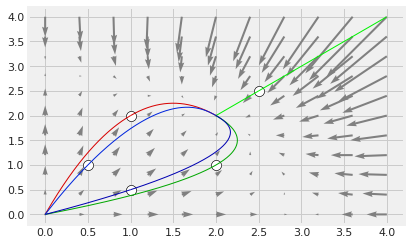

In [125]:
#specific parameters and encoding for x'(t) and y'(t)
[E_x,E_y,K_x,K_y] = [6,6,3,3]
def dx(x,y):
  return(x*(1-x/K_x - y/E_y))
def dy(x,y):
  return(y*(1-x/E_x-y/K_y))

initial_values = [(2.5,2.5),(1,2),(2,1),(1,0.5),(0.5,1)]
simulate_trajectory(dx,dy,initial_values,xmin=0,xmax=4,ymin=0,ymax=4,iterations=10000) #increase iterations to extend trajectories
plt.show() #use to show graph

Experiment with Other Parameters and Add Labels

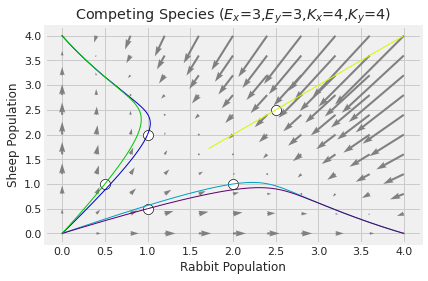

In [126]:
#new parameters 
[E_x,E_y,K_x,K_y] = [3,3,4,4]
initial_values = [(2.5,2.5),(1,2),(2,1),(1,0.5),(0.5,1)]
simulate_trajectory(dx,dy,initial_values,xmin=0,xmax=4,ymin=0,ymax=4,iterations=50000)

plt.xlabel("Rabbit Population")
plt.ylabel("Sheep Population")
plt.title("Competing Species ($E_x$={},$E_y$={},$K_x$={},$K_y$={})".format(E_x,E_y,K_x,K_y))

plt.show()

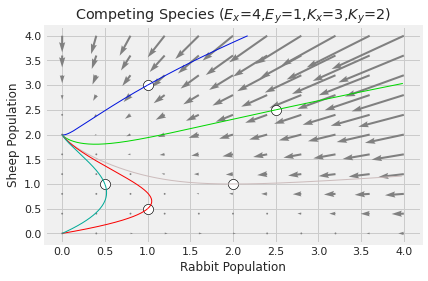

In [127]:
#another bundle of new parameters 
[E_x,E_y,K_x,K_y] = [4,1,3,2]
initial_values = [(2.5,2.5),(1,3),(2,1),(1,0.5),(0.5,1)]
simulate_trajectory(dx,dy,initial_values,xmin=0,xmax=4,ymin=0,ymax=4,iterations=50000)

plt.xlabel("Rabbit Population")
plt.ylabel("Sheep Population")
plt.title("Competing Species ($E_x$={},$E_y$={},$K_x$={},$K_y$={})".format(E_x,E_y,K_x,K_y))

plt.show()

**EXAMPLE** -- PREDATOR-PREY MODEL

We consider Lotka-Volterra equations of the form, where $A,B,C,D > 0$,
$$x'=Ax-Bxy$$
$$y'=-Cy+Dxy$$

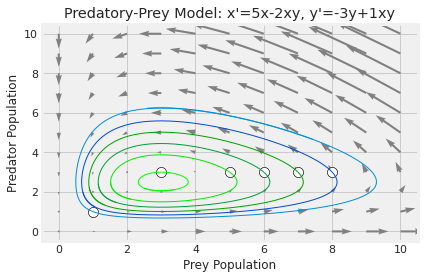

In [128]:
A = 5; B = 2; C = 3; D = 1
def dx(x,y):
  return(A*x-B*x*y)
def dy(x,y):
  return(-C*y+D*x*y)

initial_values = [(1,1),(3,3),(6,3),(7,3),(8,3),(5,3)]
simulate_trajectory(dx,dy,initial_values,xmin=0,xmax=10,ymin=0,ymax=10,iterations=1000,step_size=0.001)

plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.title("Predatory-Prey Model: x'={}x-{}xy, y'=-{}y+{}xy".format(A,B,C,D))

plt.show()

***Note:*** Due to periodic trajectories, the results may require carefully adjusting the number of iterations, and potentially using the plotter2D function in isolation to customize the iterations for each curve.


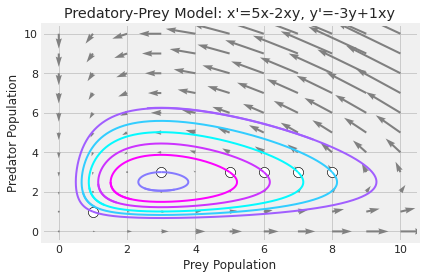

In [130]:
A = 5; B = 2; C = 3; D = 1
cp = plt.cm.cool # new colors
def dx(x,y):
  return(A*x-B*x*y)
def dy(x,y):
  return(-C*y+D*x*y)

initial_values = [(1,1),(3,3),(6,3),(7,3),(8,3),(5,3)]
simulate_trajectory(dx,dy,initial_values,xmin=0,xmax=10,ymin=0,ymax=10,iterations=1000,step_size=0.001,colormap=cp,linewidth=2)

plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.title("Predatory-Prey Model: x'={}x-{}xy, y'=-{}y+{}xy".format(A,B,C,D))

plt.show()